## Observations and Insights 

# Pymaceuticals Inc.


## Analysis : Three conclusions based on the data 

####  Tumor volume has a positive correlation to mouse size

    1. Pearsons correlation was used to regress tumor volume vs mouse weight for the average tumor values for mice who were treated with the  Capomulin regimen. The pearsons correlation was 0.84 indicating a strong correlation
    2. Additional calculations need to be done across all mice to see if the corelation is equally strong across all treatment regimens tested

#### Capomulin and Ramicane showed markedly smaller tumor volumes at the end of the study vs other treatment modalities
    
    1. Capomulin and Ramicane with mean tumors sizes at 40.22 and 40.68 respectively were 11-15 mm3 smaller than other drugs and vs placebo. A data table is displayed in the Summary Statistics section below enumerating the differences.
    2. Additional analysis should undertaken to determine if there are any differences in results between genders.
    3. A sample graph of tumor size over timepoints is shown below for one mouse in the Capomulin regimen and another in the Ceftamin protocols. If these are representative of the larger pool of results, Ceftamin is ineffective at slowing tumor growth, Capomulin shows promise.
    
#### Data points summary

    1. The gender distribution of the test points was 51% male and 49% female, thus reflecting a repectable balance. 
    2. Capomulin and Ramicane had the highest quantity of data points in the study. No explanation for this variation was given. Possible reasons may be related to mouse fatalities, tester bias or randomization of the protocals for example.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = study_results.merge(mouse_metadata, on=["Mouse ID"], how = 'outer')

# Display the data table for preview
combined_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_count = combined_results_df['Mouse ID'].nunique()
print(f"There were {mouse_count} mice in the study")


There were 249 mice in the study


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
extra_mice_df = combined_results_df.loc[combined_results_df.duplicated(subset = ["Mouse ID" , "Timepoint"], keep = False)]["Mouse ID"]
extra_mice_df


860    g989
861    g989
862    g989
863    g989
864    g989
865    g989
866    g989
867    g989
868    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
extra_mice_all_df = combined_results_df[combined_results_df.duplicated(subset = ["Mouse ID" , "Timepoint"], keep = False)]
extra_mice_all_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_df = combined_results_df[combined_results_df['Mouse ID'].isin(extra_mice_df) == False]
cleaned_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
rev_mouse_count = cleaned_mice_df["Mouse ID"].nunique()
print(f"There are {rev_mouse_count} mice in the cleaned study data")

There are 248 mice in the cleaned study data


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_group = cleaned_mice_df.groupby('Drug Regimen')
means = regimen_group.mean()['Tumor Volume (mm3)']
medians = regimen_group.median()['Tumor Volume (mm3)']
variances = regimen_group.var()['Tumor Volume (mm3)'] 
stdevs = regimen_group.std()['Tumor Volume (mm3)']
SEMs = regimen_group.sem()['Tumor Volume (mm3)']

drug_regimen_results = pd.DataFrame(means)
drug_regimen_results = drug_regimen_results.rename(columns = {'Tumor Volume (mm3)': 'Mean Tumor Volume'})
drug_regimen_results['Median Tumor Volume'] = medians
drug_regimen_results['Tumor Volume Variance'] = variances
drug_regimen_results['Tumor Volume Std. Dev.'] = stdevs
drug_regimen_results['Tumor Volume Std. Err.'] = SEMs                                                              
drug_regimen_results


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

tumorsize_by_regimen = cleaned_mice_df.groupby('Drug Regimen')

tumor_stats_by_regimen =  tumorsize_by_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
tumor_stats_by_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

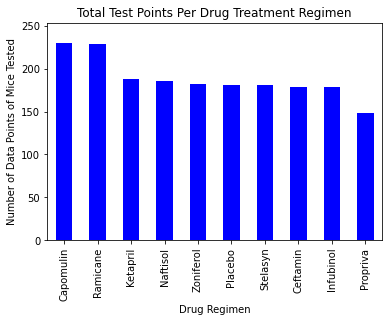

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice-tests for each treatment throughout the course of the study using pandas. 
mice_regimen_data = cleaned_mice_df.groupby(['Drug Regimen']).count()['Mouse ID']
mice_regimen_df = pd.DataFrame(mice_regimen_data)
mice_regimen_df = mice_regimen_df.sort_values(by=['Mouse ID'], ascending=False)
mice_regimen_df


bar1 = mice_regimen_df.plot.bar(rot = 90, legend = False, color = "b")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points of Mice Tested")
plt.ylim(0, round(max(mice_regimen_df["Mouse ID"])*1.10,2))
plt.title("Total Test Points Per Drug Treatment Regimen")
plt.show()
plt.savefig("Total_Test_Points_Per_Drug_Treatment_Regimen-bar1")



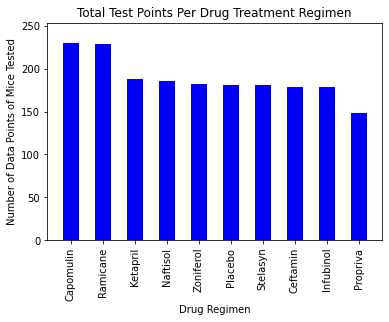

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
index_mice_regimen_df = mice_regimen_df.reset_index() 

plt.figure(figsize=(6,4))
x_axis = np.arange(len(mice_regimen_df))
tick_locations = [x for x in x_axis]
                 
plt.bar(x_axis, mice_regimen_df["Mouse ID"], color ='b', align="center", width = 0.5)
plt.xticks(tick_locations, index_mice_regimen_df["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points of Mice Tested")
plt.title("Total Test Points Per Drug Treatment Regimen")

# Makes the bars less crowded at the top and save figure
plt.ylim(0, round(max(mice_regimen_df["Mouse ID"])*1.10,2))

plt.savefig("Total_Test_Points_Per_Drug_Treatment_Regimen-bar2")


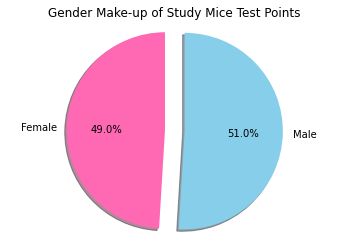

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First get data for mice by gender
gender_table = cleaned_mice_df.groupby(['Sex']).count()['Mouse ID']
gender_table
pie_labels = ['Female','Male']
pie_colors = ['HotPink','SkyBlue']
pie_explode = (0.1,0.1)
plt.pie(gender_table,labels=pie_labels,autopct='%1.1f%%',startangle = 90, shadow=True, colors=pie_colors, explode = pie_explode)
plt.title('Gender Make-up of Study Mice Test Points')
plt.axis('equal')
plt.show()
plt.savefig('Gender_make-up_of_study_mice-pie1')

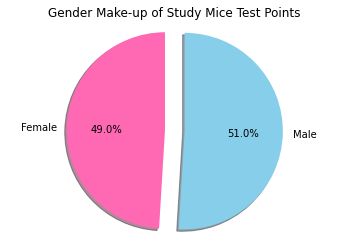

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = gender_table.reset_index()

pie_colors = ['HotPink','SkyBlue']
pie_explode = (0.1,0.1)
pie2 = plt.pie(pie_data['Mouse ID'],labels=pie_data['Sex'],autopct='%1.1f%%',startangle = 90, shadow=True, colors=pie_colors, explode = pie_explode)
plt.title('Gender Make-up of Study Mice Test Points')
plt.axis('equal')
plt.show()
plt.savefig('Gender_make-up_of_study_mice-pie2')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_max_time_gb = cleaned_mice_df.groupby('Mouse ID')
mice_max_time_data = mice_max_time_gb['Timepoint'].max()
mice_max_time_df = mice_max_time_data.reset_index()
mice_max_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_time_tumor_merge = pd.merge(mice_max_time_df, cleaned_mice_df, on=['Mouse ID', 'Timepoint'], how = 'left' )
mice_time_tumor_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = mice_time_tumor_merge.loc[mice_time_tumor_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
   
    # add subset 
    tumor_vol_data.append(tumor_vol_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



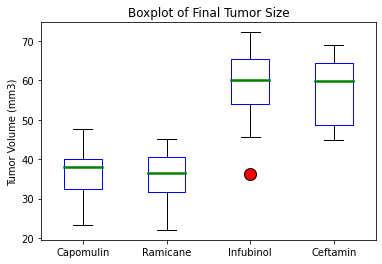

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - using matplotlib
# generate list for the 4 regimens
selected_results = mice_time_tumor_merge[mice_time_tumor_merge['Drug Regimen'].isin(regimen_list)]
four_regimen_results = selected_results[['Drug Regimen','Tumor Volume (mm3)']]

#Create a numpy array to feed into the plt.boxplot
Capomulin = four_regimen_results.loc[four_regimen_results['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)'].values
Ramicane = four_regimen_results.loc[four_regimen_results['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)'].values
Infubinol = four_regimen_results.loc[four_regimen_results['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)'].values
Ceftamin = four_regimen_results.loc[four_regimen_results['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)'].values

#define dictionaries for customizing the look of the boxplot elements
box = dict(linestyle='-', linewidth=1, color='blue')
dot = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
med = dict(linewidth=2.5, color='green')

plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],medianprops=med, flierprops =dot,boxprops=box);
plt.ylabel('Tumor Volume (mm3)')
plt.title('Boxplot of Final Tumor Size')
plt.savefig('boxplt_of_Tumor_Volume_vs_Drug_Regimen_matplotlib')

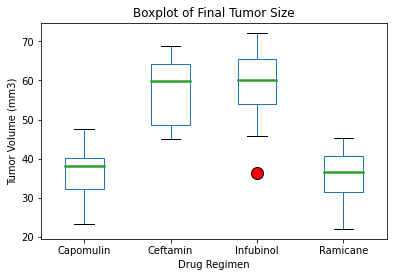

In [16]:
# This is using Pandas - it is here for my future edification

four_regimen_results.boxplot(column='Tumor Volume (mm3)',by = 'Drug Regimen',grid = False, medianprops=med, flierprops=dot, boxprops=box)

plt.title('Boxplot of Final Tumor Size')
plt.suptitle('')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('boxplt_of_Tumor_Volume_vs_Drug_Regimen_pandas')

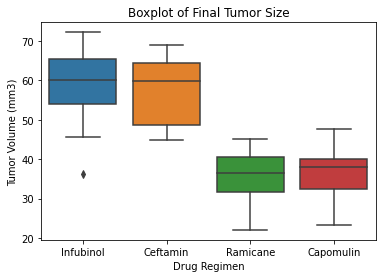

In [17]:
# This is not from the homework requirements. I added it in for my future edification
import seaborn as sns

sns.boxplot(x = 'Drug Regimen', y='Tumor Volume (mm3)', data = four_regimen_results)
plt.title('Boxplot of Final Tumor Size')
plt.savefig('boxplt__of_Tumor_Volume_vs_Drug_Regimen_seaborn')

## Line and Scatter Plots

Text(0.5, 15.0, 'Timepoint')

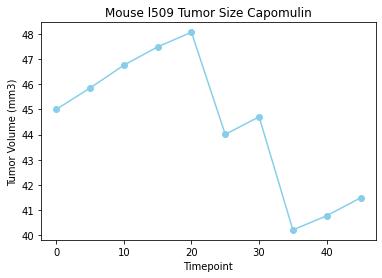

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin -Mouse ID = l509
mouse_l509 = cleaned_mice_df[cleaned_mice_df['Mouse ID'].isin(['l509'])]
plt.plot(mouse_l509['Timepoint'],mouse_l509['Tumor Volume (mm3)'],marker ='o', color="SkyBlue", linewidth=1.5)
plt.title('Mouse l509 Tumor Size Capomulin')
plt.savefig('lineChartMouseL509_Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')





Text(0.5, 15.0, 'Timepoint')

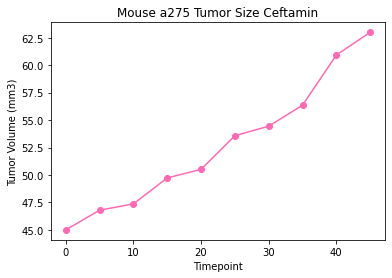

In [19]:
#I generated a few more for creating figures this is different regimen than the homework mouse -with less favorable results
# If this were a more detailed study the difference in start and finish tumor volumes is significant
mouse_a275 = cleaned_mice_df[cleaned_mice_df['Mouse ID'].isin(['a275'])]
plt.plot(mouse_a275['Timepoint'],mouse_a275['Tumor Volume (mm3)'],marker ='o', color="HotPink", linewidth=1.5)
plt.title('Mouse a275 Tumor Size Ceftamin')
plt.savefig('lineChartMouseA275_Ceftamin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')



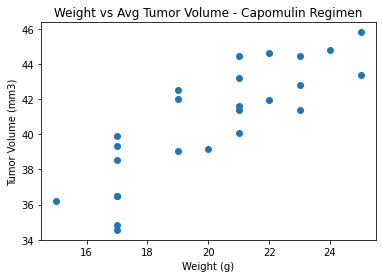

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Use the original cleaned mouse dataframe to get all data points for the  Capomulin regimen
capomulin_results = cleaned_mice_df[cleaned_mice_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_weight_results = capomulin_results[['Mouse ID','Tumor Volume (mm3)','Weight (g)']]

#use groupby Mouse ID to then apply mean to get average tumor size
capomulin_weight_results_gb = capomulin_weight_results.groupby('Mouse ID')
capomulin_plot_data = capomulin_weight_results_gb.mean()

#Set up scatter plot
plt.scatter(capomulin_plot_data['Weight (g)'],capomulin_plot_data['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Weight vs Avg Tumor Volume - Capomulin Regimen')
plt.savefig('scatter_Weight_vs_Average_Tumor_size_matplotlib')

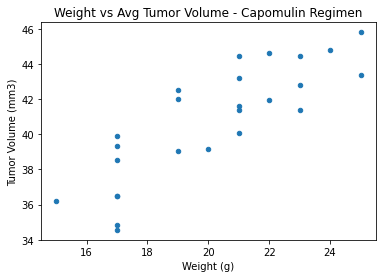

In [21]:
# This is using Pandas - it is here for my future edification

capomulin_plot_data.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)',grid = False)
plt.title('Weight vs Avg Tumor Volume - Capomulin Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('scatter_Weight_vs_Average_Tumor_size_pandas')

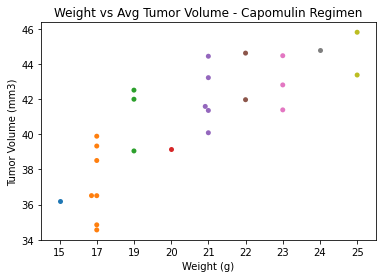

In [22]:
# This is not from the homework requirements. I added it in for my future edification
sns.swarmplot(x = 'Weight (g)', y='Tumor Volume (mm3)', data = capomulin_plot_data)
plt.title('Weight vs Avg Tumor Volume - Capomulin Regimen')
plt.savefig('scatter_Weight_vs_Average_Tumor_size_seaborn')

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor = capomulin_plot_data['Tumor Volume (mm3)']
weight = capomulin_plot_data['Weight (g)']
correlation = st.pearsonr(weight,tumor)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84


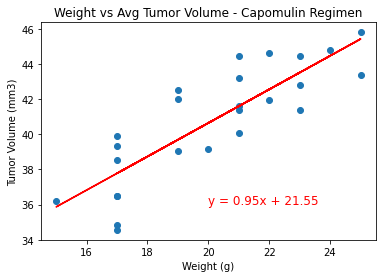

In [24]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
x_values = capomulin_plot_data['Weight (g)']
y_values = capomulin_plot_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Weight vs Avg Tumor Volume - Capomulin Regimen')
plt.savefig('Regress_Weight_vs_Average_Tumor_size_matplotlib')
plt.show()

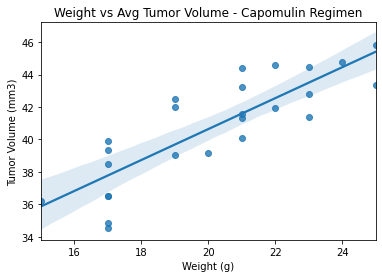

In [25]:
# This is not from the homework requirements. I added it in for my future edification
sns.regplot(x = 'Weight (g)', y='Tumor Volume (mm3)', data = capomulin_plot_data)
plt.title('Weight vs Avg Tumor Volume - Capomulin Regimen')
plt.savefig('regplot_Weight_vs_Average_Tumor_size_seaborn')